### Importing useful libraries 


In [461]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # data visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

### Loading the dataset 
#### For implementation we will be using house prediction dataset . The dataset can be found [here](https://github.com/vrinda01go/Hellofoss/blob/main/Room_price_data.csv)

In [462]:
df = pd.read_csv("Hostel_Linear-Dataset.csv")  #import text file 


In [463]:
df.head()

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,NaN,3,1,788,8
3,2362.0,3,2,924,2
4,NaN,3,2,1098,5


# Visualizing and Cleaning the data

We will now be removing the nan values and identical values from the dataset

For seeing if there are nan values in the dataset we will use the isna() function and then to remove them we will use the dropna() function. We will need to set additional parameters like rows and columns in the dropna function depending on the number of nan values present for each column

Using the sum() function with isna() function we can get to know the number of missing values in each column

In [464]:
#fill
df.isna().sum()

Price         1531
Hostel No.       0
Occupancy        0
Room Size        0
Floor            0
dtype: int64

After this we will proceed to remove the nan values 

Since there are not many nan values in the column 'Price' as compared to the number of rows we will remove the rows which have nan values. 

Reseting the index after removing the nan values and dropping the old index will also be important

In [465]:
#fill

df = df.dropna(subset = ['Price'],how= 'any',axis=0).reset_index(drop = True)
df

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,2362.0,3,2,924,2
3,1432.0,2,1,706,3
4,1702.0,2,2,1038,3
...,...,...,...,...,...
5002,1624.0,2,1,674,3
5003,1470.0,2,1,626,3
5004,1020.0,3,2,1006,3
5005,2400.0,2,2,938,1


Now we can use the drop_duplicate function to remove the duplicate values

This function has a parameter calle 'keep' where we specifiy to drop and which value to keep

For this excercise we will keep the first values and drop the rest of the duplicates

In [466]:
#fill
df.drop_duplicates(keep='first').reset_index(drop=True)

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,2362.0,3,2,924,2
3,1432.0,2,1,706,3
4,1702.0,2,2,1038,3
...,...,...,...,...,...
5000,1624.0,2,1,674,3
5001,1470.0,2,1,626,3
5002,1020.0,3,2,1006,3
5003,2400.0,2,2,938,1


For visualizing the data we will first start with looking at the distribution of different columns to see if there are enough number for each category in every column and dropping them if the data is biased for one category more than the other

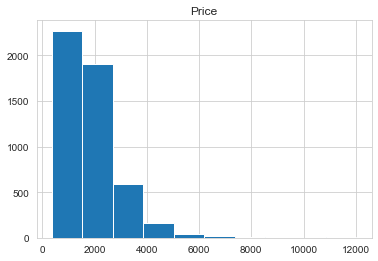

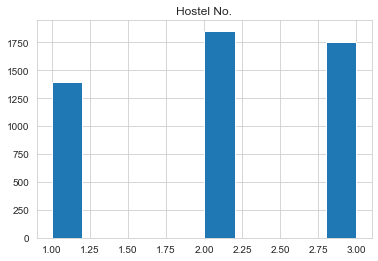

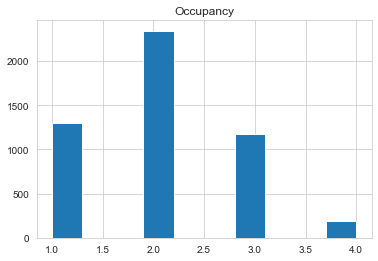

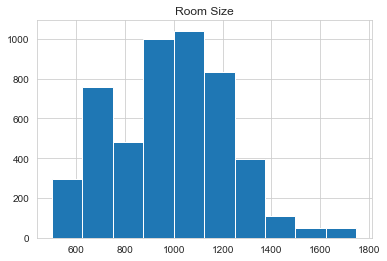

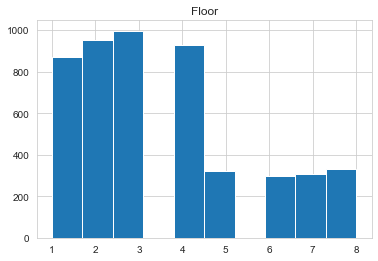

In [467]:
columns = df.columns
for column in columns:
    df.hist(column)
    

We can clearly notice that for the Occupancy column the (occupancy) = 4 has a really low set of data points as compared to others. Hence we can proceed in dropping those rows where the occupancy is 4

In [468]:
df = df.drop(df[df["Occupancy"]==4].index,axis=0)

In [469]:
df.head()

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,2362.0,3,2,924,2
3,1432.0,2,1,706,3
4,1702.0,2,2,1038,3


We will now write the columns between categorical and numerical

categorical = Hostel No, occupancy, floor

Numerical = price, occupancy, roomsize, floor, hostel No.

Remember that we can treat Hostel Number and occupancy as numerical or categorical. For this notebook we will treat them as categorical for data visualization and numerical for the regression

We will also plot the scatter plots and the correlation map to analyse the relation ships between different numerical columns

In [470]:
categorical = ['Hostel No.', 'Occupancy', 'Floor']
numerical = [ 'Price', 'Room Size']

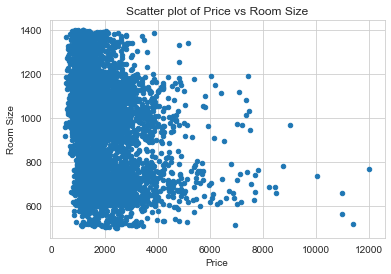

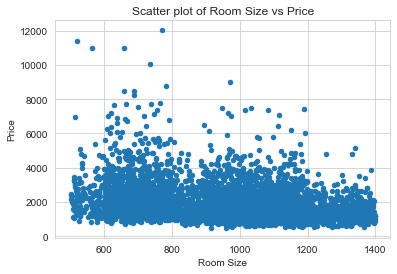

In [471]:
for column1 in numerical:
    for column2 in numerical:
        if(column1 != column2):
            df.plot.scatter(x=column1,y=column2)
            plt.title('Scatter plot of '+ column1 + ' vs ' + column2)
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

We can notice that there are no linear relation present between the numerical columns. Hence no need to drop anything

Now we will plot box plots of categorical and numerical columns to get more information about the number of outliers and the distrubtion.

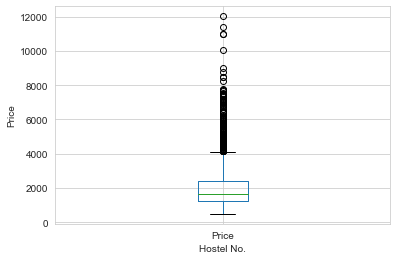

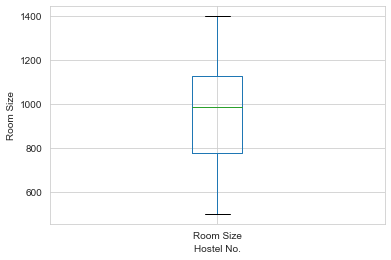

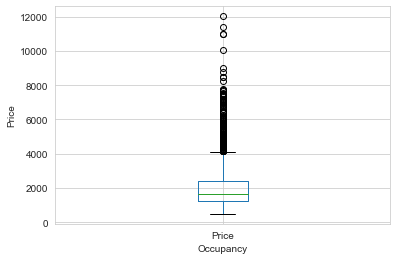

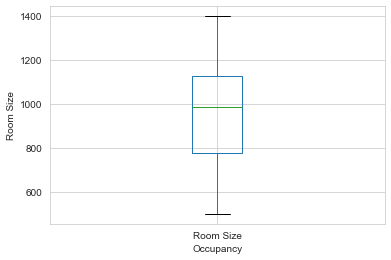

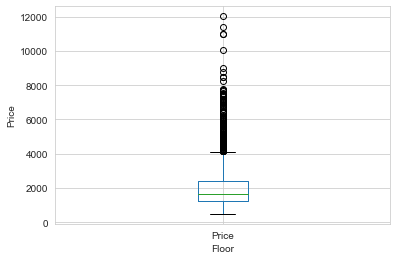

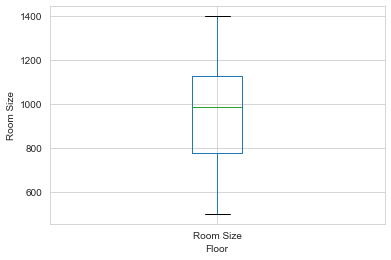

In [472]:
for c in categorical:
    for n in numerical:
        df.plot.box(x= c, y= n)
        plt.xlabel(c)
        plt.ylabel(n)
        plt.show()

Now that we have analysed our data we can proceed to normalixing our data and regression

### Importing useful libraries 


In [473]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # data visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

### Loading the dataset 
#### For implementation we will be using house prediction dataset . The dataset can be found [here](https://github.com/vrinda01go/Hellofoss/blob/main/Insti_data.csv)

In [474]:
data = np.array(df, dtype=float)
data

array([[2.540e+03, 3.000e+00, 1.000e+00, 6.860e+02, 8.000e+00],
       [2.900e+03, 3.000e+00, 2.000e+00, 9.660e+02, 5.000e+00],
       [2.362e+03, 3.000e+00, 2.000e+00, 9.240e+02, 2.000e+00],
       ...,
       [1.020e+03, 3.000e+00, 2.000e+00, 1.006e+03, 3.000e+00],
       [2.400e+03, 2.000e+00, 2.000e+00, 9.380e+02, 1.000e+00],
       [9.500e+02, 3.000e+00, 2.000e+00, 1.053e+03, 2.000e+00]])

#### Since our dataset has four features i.e Hostel No. , Occupancy, Room Size and Floor ,our hypothesis function becomes
### hθ(x) = θ0 + θ1x1 + θ2x2 +θ3x3 + θ4x4
#### where x1 ,x2,x3 and x4 are the two features (i.e. size of house and number of rooms)

### So Your task is to define hypothesis function having 4 features and a corresponding cost function 

In [475]:
def hypothesis(theta,x):
    h=np.dot(x,theta)
    return h 

In [476]:
def cost(theta,x,y):
    p=hypothesis(theta,x)
    c=(1/(2*len(y))) * np.sum(np.square(p-y))
    return c

### Gradient Descent 
#### So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in.
### Your next task is to define gradient descent function having some specific value of learning rate and number of epochs.
#### Note that learning rate should be neither very high nor very low .Why?
#### Check out exact reason [here](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)



In [477]:
def gradient(theta,x,y,alpha,i):
    len_y=len(y)
    costs=[]
    for n in range(i):
        
        theta=theta-(1/len_y)*alpha*np.dot(x.T,((hypothesis(theta,x)-y)))
        costs.append(cost(theta,x,y))
        
    plt.plot(costs)
    plt.title("Costs- epoch graph")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()
        
    return theta

### Now we want to visualize how our cost function varies with number of epochs .So your next task is to plot graph of updated costs vs number of epochs 

#### After plotting above graph you will notice that your cost function decreases with epochs.
#### Perfect! This is all what we wanted to seek by doing linear regression. 

#### Now it's time to test our model on some test data. 

#### For this you will define a test function that will take as input Hostel No. , Occupancy, Room Size , Floor and the final theta vector that was returned by our linear regression model and will give us the price of the house. Compute it for any set of features given and final value of theta as given by gradient descent function

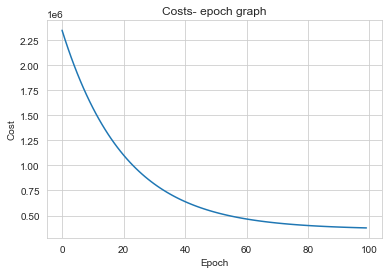

In [478]:
data[:,3]/=1000.0
x=data[:,1:]
y=data[:,0]
theta=np.zeros((4))
theta1=gradient(theta,x,y,0.001,100)

#### Now since we have defined all required functions , we can call functions one by one and get our final results .
#### Your final task is to use all functions defined above and predict the price of room for some input combinations to check how well your model works.

#### You can try playing with different values of alpha and epochs and see which combination gives most accurate results but do lookout for overfitting 


In [479]:
display(pd.DataFrame({"Predicted values":x.dot(theta1),"Actual values":y}))

,Predicted values,Actual values
0,3163.493638,2540.0
1,2355.942240,2900.0
2,1401.808513,2362.0
3,1427.237728,1432.0
4,1574.480127,1702.0
...,...,...
4812,1425.125507,1624.0
4813,1421.957175,1470.0
4814,1724.341559,1020.0
4815,933.638478,2400.0
